In [ ]:
#pip install missingno

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime

In [29]:
service=pd.read_excel('../Archivos/service.xlsx')
claim=pd.read_excel('../Archivos/claim.xlsx')
people=pd.read_excel('../Archivos/people.xlsx')
status=pd.read_excel('../Archivos/status.xlsx')
status_type=pd.read_excel('../Archivos/status_type.xlsx')
status_cause=pd.read_excel('../Archivos/status_cause.xlsx')

## Análisis Exploratorio de Datos

#### TABLA SERVICE

Se tienen 838 servicios brindados, de los cuales solo 452 cuentan con amounts capturados.

In [4]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              838 non-null    object 
 1   type_status_id  838 non-null    object 
 2   people_id       838 non-null    object 
 3   provider_id     471 non-null    object 
 4   subprovider_id  533 non-null    object 
 5   coverage_id     447 non-null    object 
 6   seq             838 non-null    int64  
 7   number          838 non-null    object 
 8   amount          452 non-null    float64
 9   deductible      838 non-null    bool   
 10  description     166 non-null    object 
 11  created_by      838 non-null    object 
 12  created_at      838 non-null    object 
 13  updated_at      838 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 86.1+ KB


Hay un gran porcentaje de valores nulos en las columnas provider_id,subprovider_id,coverage_id,amount y description. Se debe tomar una decisión de manejo de datos para estas columnas.

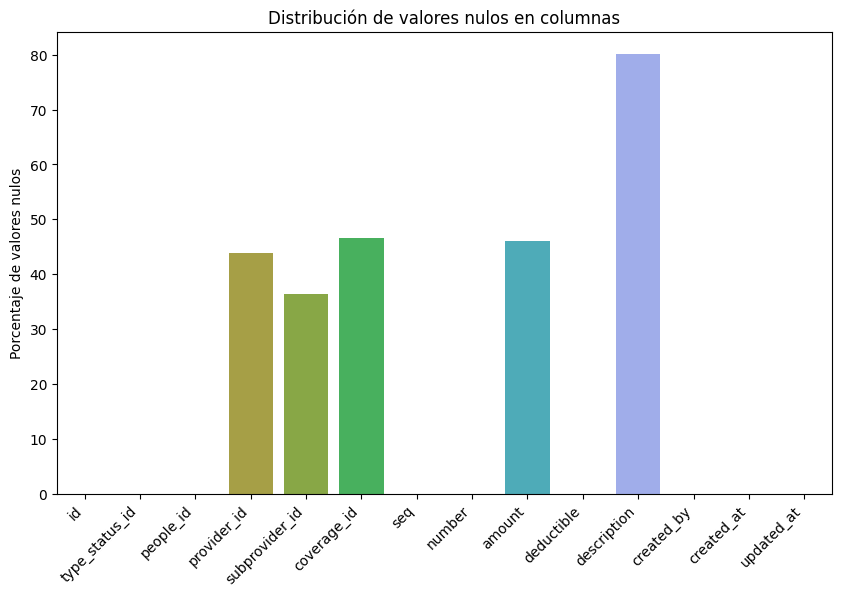

<Figure size 1000x600 with 0 Axes>

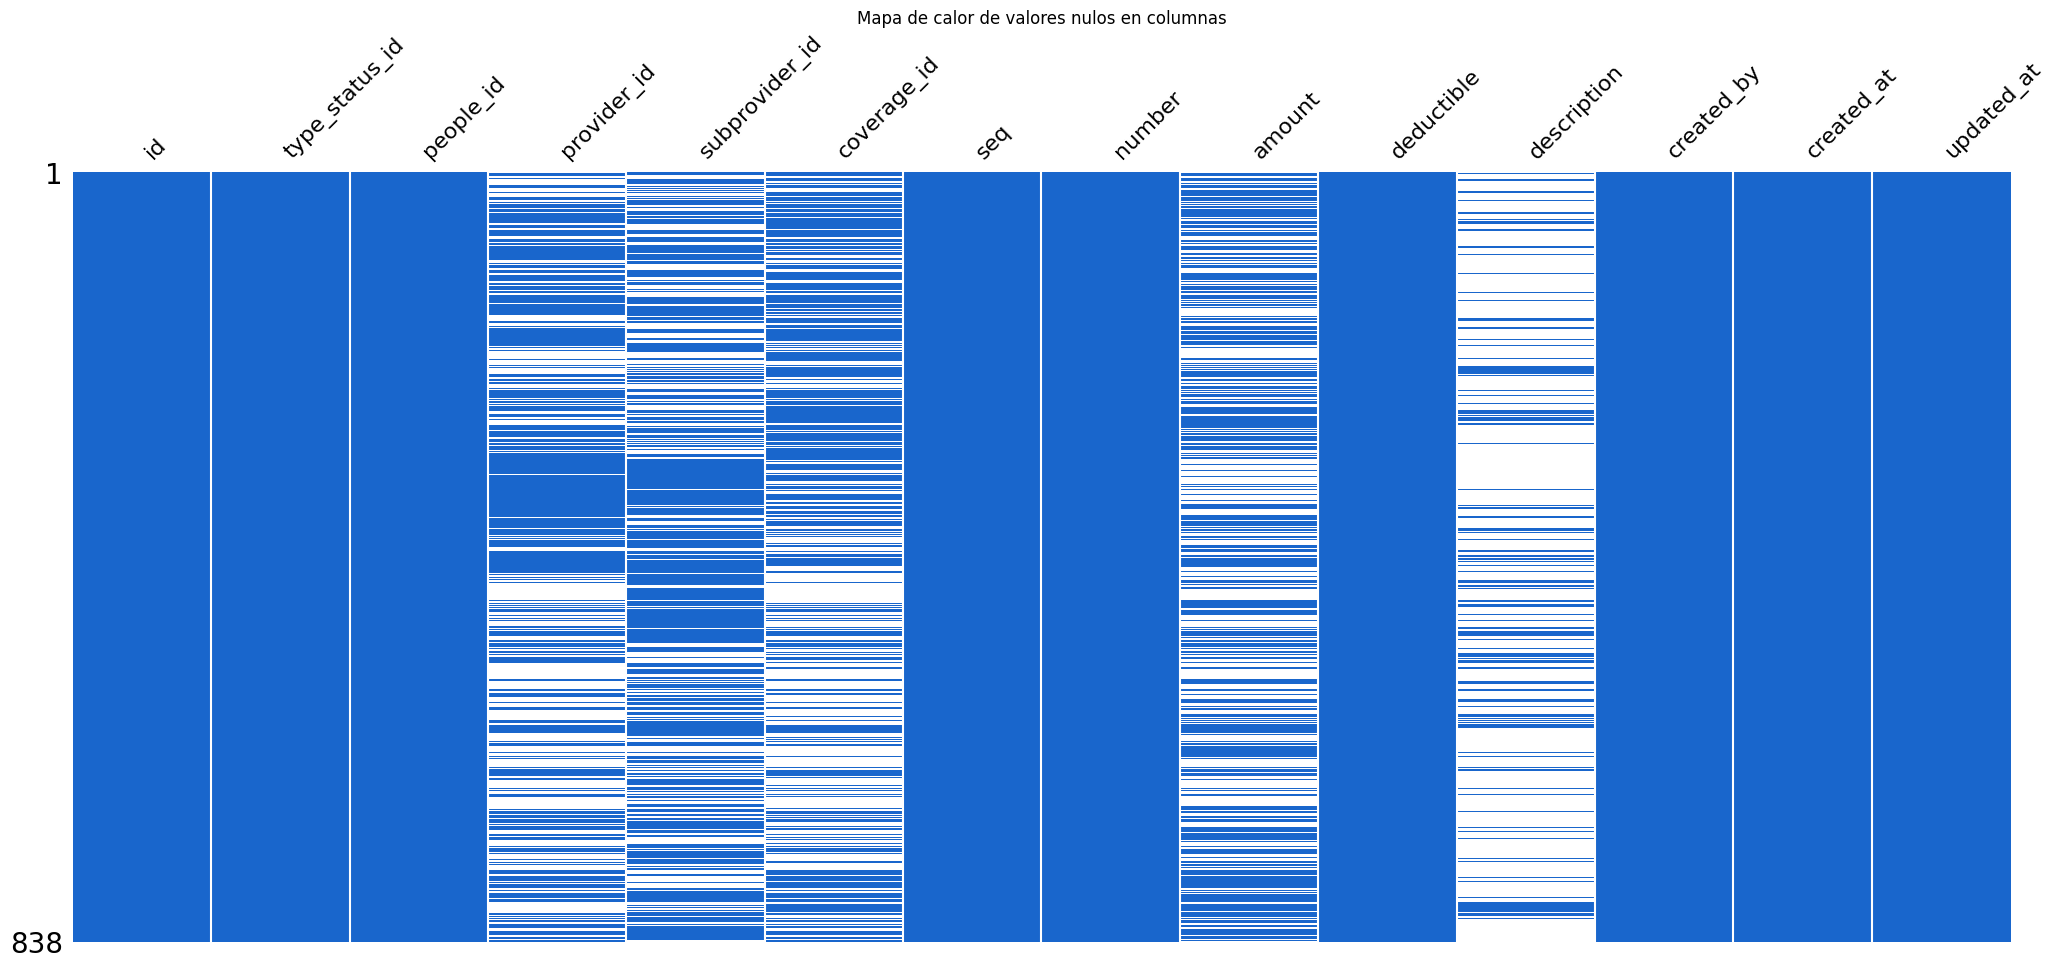

In [28]:
# Gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=service.columns, y=service.isnull().mean() * 100)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Porcentaje de valores nulos')
plt.title('Distribución de valores nulos en columnas')
plt.show()

# Mapa de calor con missingno
plt.figure(figsize=(10, 6))
msno.matrix(service, sparkline=False, color=(0.1, 0.4, 0.8))  # Ajusta el color según tus preferencias
plt.title('Mapa de calor de valores nulos en columnas')
plt.savefig('../Graficos/')
plt.show()

Dado que solo hay 442 "people_id" en los 838 servicios, se entiende que un Siniestro puede tener más de un servicio.


In [24]:
service['people_id'].nunique()

442

Estadísticas descriptivas de la columna "amount". 

La columna "amount" tiene una gran variabilidad en sus valores, con una media negativa y valores extremadamente bajos (negativos) y altos. La mediana es negativa, indicando una asimetría hacia la izquierda en la distribución de los datos. La desviación estándar es bastante alta, lo que refleja la dispersión amplia de los valores.

In [5]:
service['amount'].describe()

count    4.520000e+02
mean    -1.022953e+07
std      8.964714e+07
min     -1.312312e+09
25%     -5.000000e+05
50%     -6.536000e+04
75%     -4.053500e+03
max      8.989898e+06
Name: amount, dtype: float64

##### Es necesario verificar la veracidad de los datos capturados, ya que afectan al análisis de no ser ciertos. Pero no se eliminarán para realizar los cálculos pedidos.

In [23]:
# Calcular límites para identificar valores atípicos (por ejemplo, utilizando el rango intercuartílico)
Q1 = service['amount'].quantile(0.25)
Q3 = service['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = service[(service['amount'] < lower_limit) | (service['amount'] > upper_limit)]
print("Se tienen 45 valores atípicos:")
outliers.shape[0]

Se tienen 45 valores atípicos:


45

Gráfico  boxplots para observar la distribución estadística de un conjunto de datos. Este tipo de gráfico es particularmente útil para identificar la presencia de valores atípicos y para comparar distribuciones entre diferentes categorías

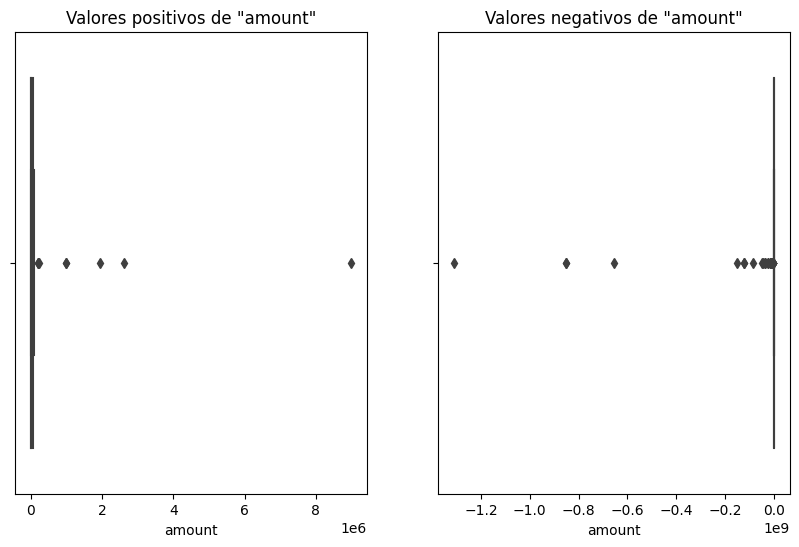

In [128]:
# Separar los datos en valores positivos y negativos
positive_amounts = service[service['amount'] > 0]['amount']
negative_amounts = service[service['amount'] < 0]['amount']

# Crear dos boxplots separados
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=positive_amounts)
plt.title('Valores positivos de "amount"')

plt.subplot(1, 2, 2)
sns.boxplot(x=negative_amounts)
plt.title('Valores negativos de "amount"')
plt.savefig('../Graficos/EDA_Amount')

plt.show()

#### Distribución de amount, quitando los valores atípicos.

Se reafirma la distribución cargada a los valores negativos y un gran cantidad de valores con amount igual a cero, también se debe comprobar porque tienen 0 esos servicios y de ahí decidir si sirve incluirlos para futuros análisis. 

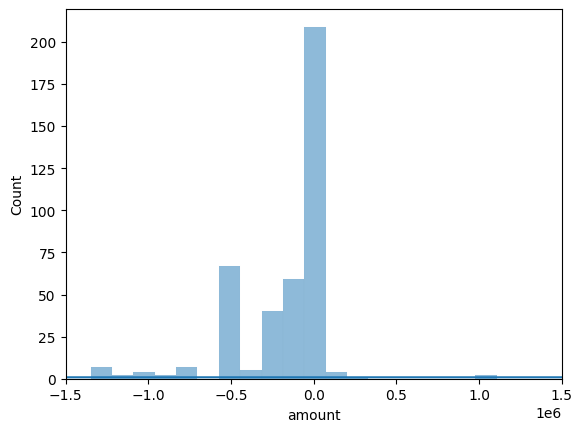

In [129]:
# Histograma con límites ajustados para 'amount'
sns.histplot(service['amount'], kde=True)
plt.xlim(-1.5e6, 1.5e6)  # Ajusta estos límites según tus necesidades
plt.savefig('../Graficos/EDA_Amount2')
plt.show()

#### TABLA CLAIM

Se tienen 569 entradas.

In [32]:
#No se tienen variables numéricas interesantes
claim.columns

Index(['id', 'type_status_id', 'address_id', 'original_claim_id',
       'liability_status_id', 'cancelled_reason_status_id',
       'status_cause_type_id', 'seq', 'number', 'policy_id', 'policy_number',
       'created_by', 'declaration_cabin', 'occurred_at', 'reporting_name',
       'reporting_phone', 'third_car_description', 'scheduled_at',
       'declaration', 'conclusion', 'created_at', 'updated_at',
       'policy_person_id', 'amis_reported_at'],
      dtype='object')

In [31]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          569 non-null    object 
 1   type_status_id              453 non-null    object 
 2   address_id                  422 non-null    object 
 3   original_claim_id           45 non-null     object 
 4   liability_status_id         184 non-null    object 
 5   cancelled_reason_status_id  17 non-null     object 
 6   status_cause_type_id        156 non-null    object 
 7   seq                         569 non-null    int64  
 8   number                      569 non-null    object 
 9   policy_id                   569 non-null    object 
 10  policy_number               569 non-null    object 
 11  created_by                  569 non-null    object 
 12  declaration_cabin           426 non-null    object 
 13  occurred_at                 432 non

<Figure size 1000x600 with 0 Axes>

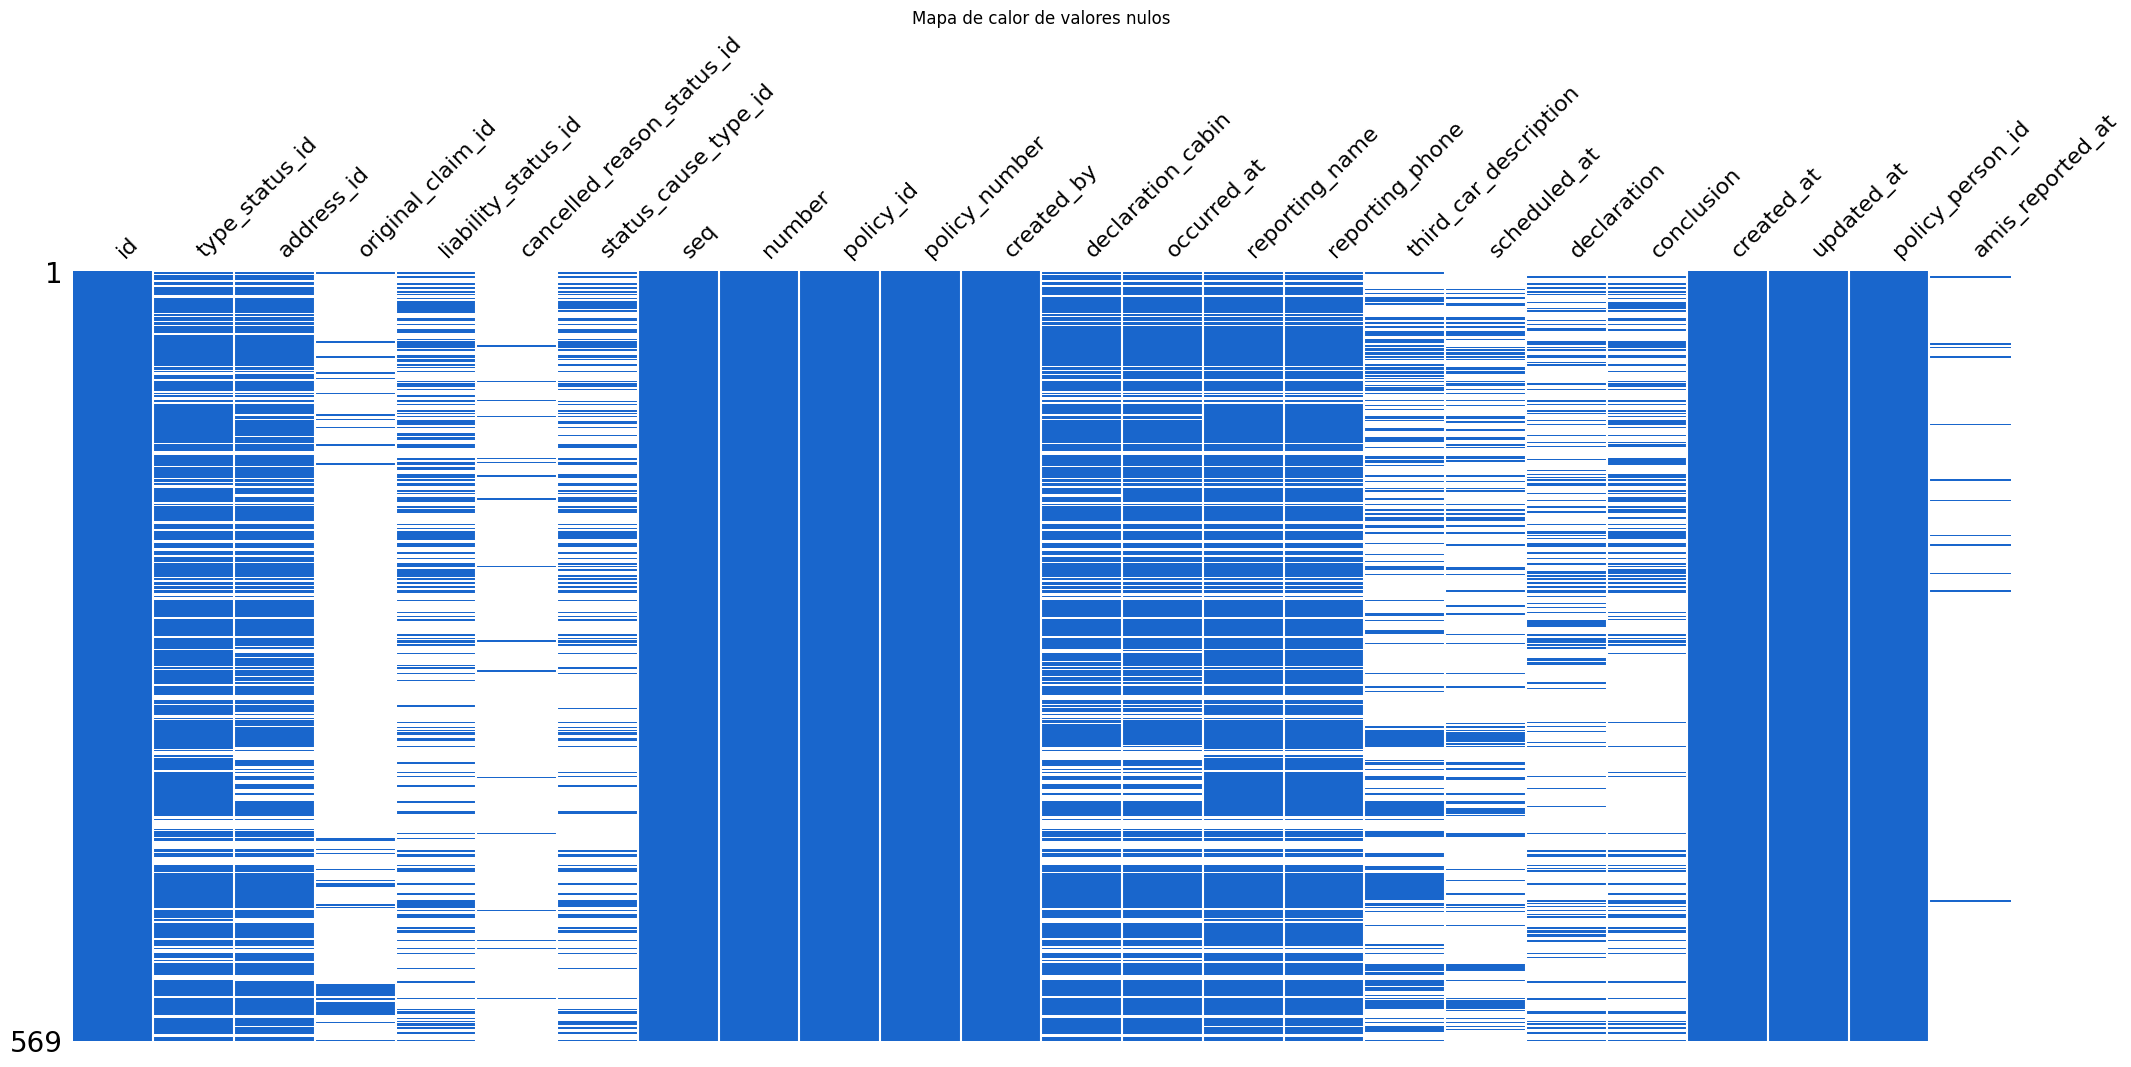

In [35]:
# Crear un mapa de calor con missingno
plt.figure(figsize=(10, 6))
msno.matrix(claim, sparkline=False, color=(0.1, 0.4, 0.8))  # Ajusta el color según tus preferencias
plt.title('Mapa de calor de valores nulos')
plt.show()

Type_status_id

In [110]:
claime_merge=pd.merge(right=claim,left=status,right_on='type_status_id',left_on='id',how='right')

In [113]:
claime_merge.dropna(subset='status_type_id',inplace=True)

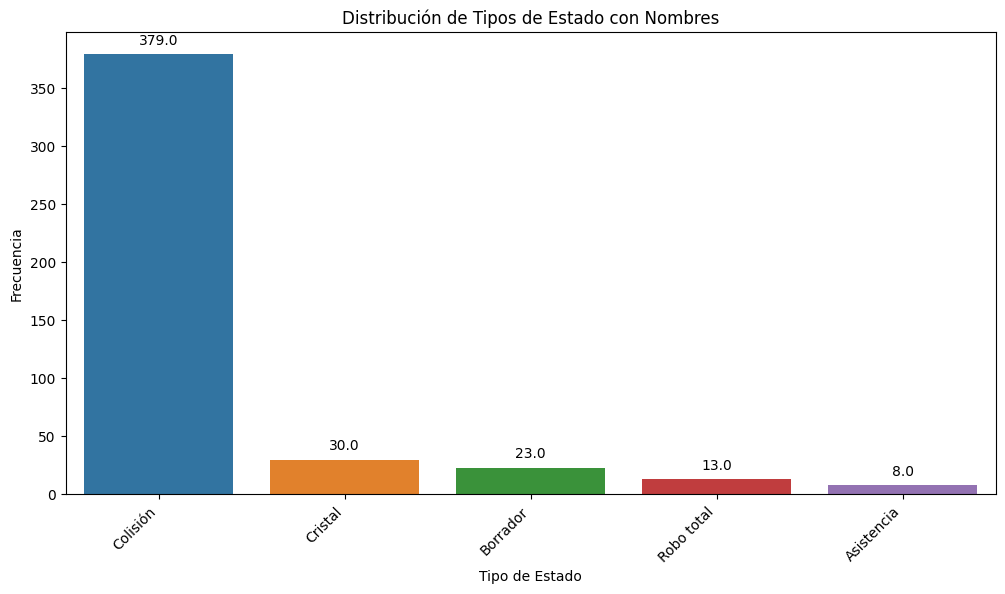

In [114]:
# Gráfico de barras para la distribución de tipos de estado de los claims
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='name', data=claime_merge, order=claime_merge['name'].value_counts().index)
plt.xlabel('Tipo de Estado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Estado con Nombres')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de cantidad encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

#### TABLA PEOPLE

Se tienen 765 usuarios con siniestros.

In [38]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                765 non-null    object        
 1   claim_id          765 non-null    object        
 2   type_status_id    765 non-null    object        
 3   vehicle_id        664 non-null    object        
 4   license_id        153 non-null    object        
 5   policy_id         226 non-null    object        
 6   address_id        643 non-null    object        
 7   cancelled_at      21 non-null     object        
 8   first_name        765 non-null    object        
 9   first_last_name   728 non-null    object        
 10  second_last_name  724 non-null    object        
 11  phone             765 non-null    object        
 12  email             706 non-null    object        
 13  created_by        225 non-null    object        
 14  birthdate         679 non-

<Figure size 1000x600 with 0 Axes>

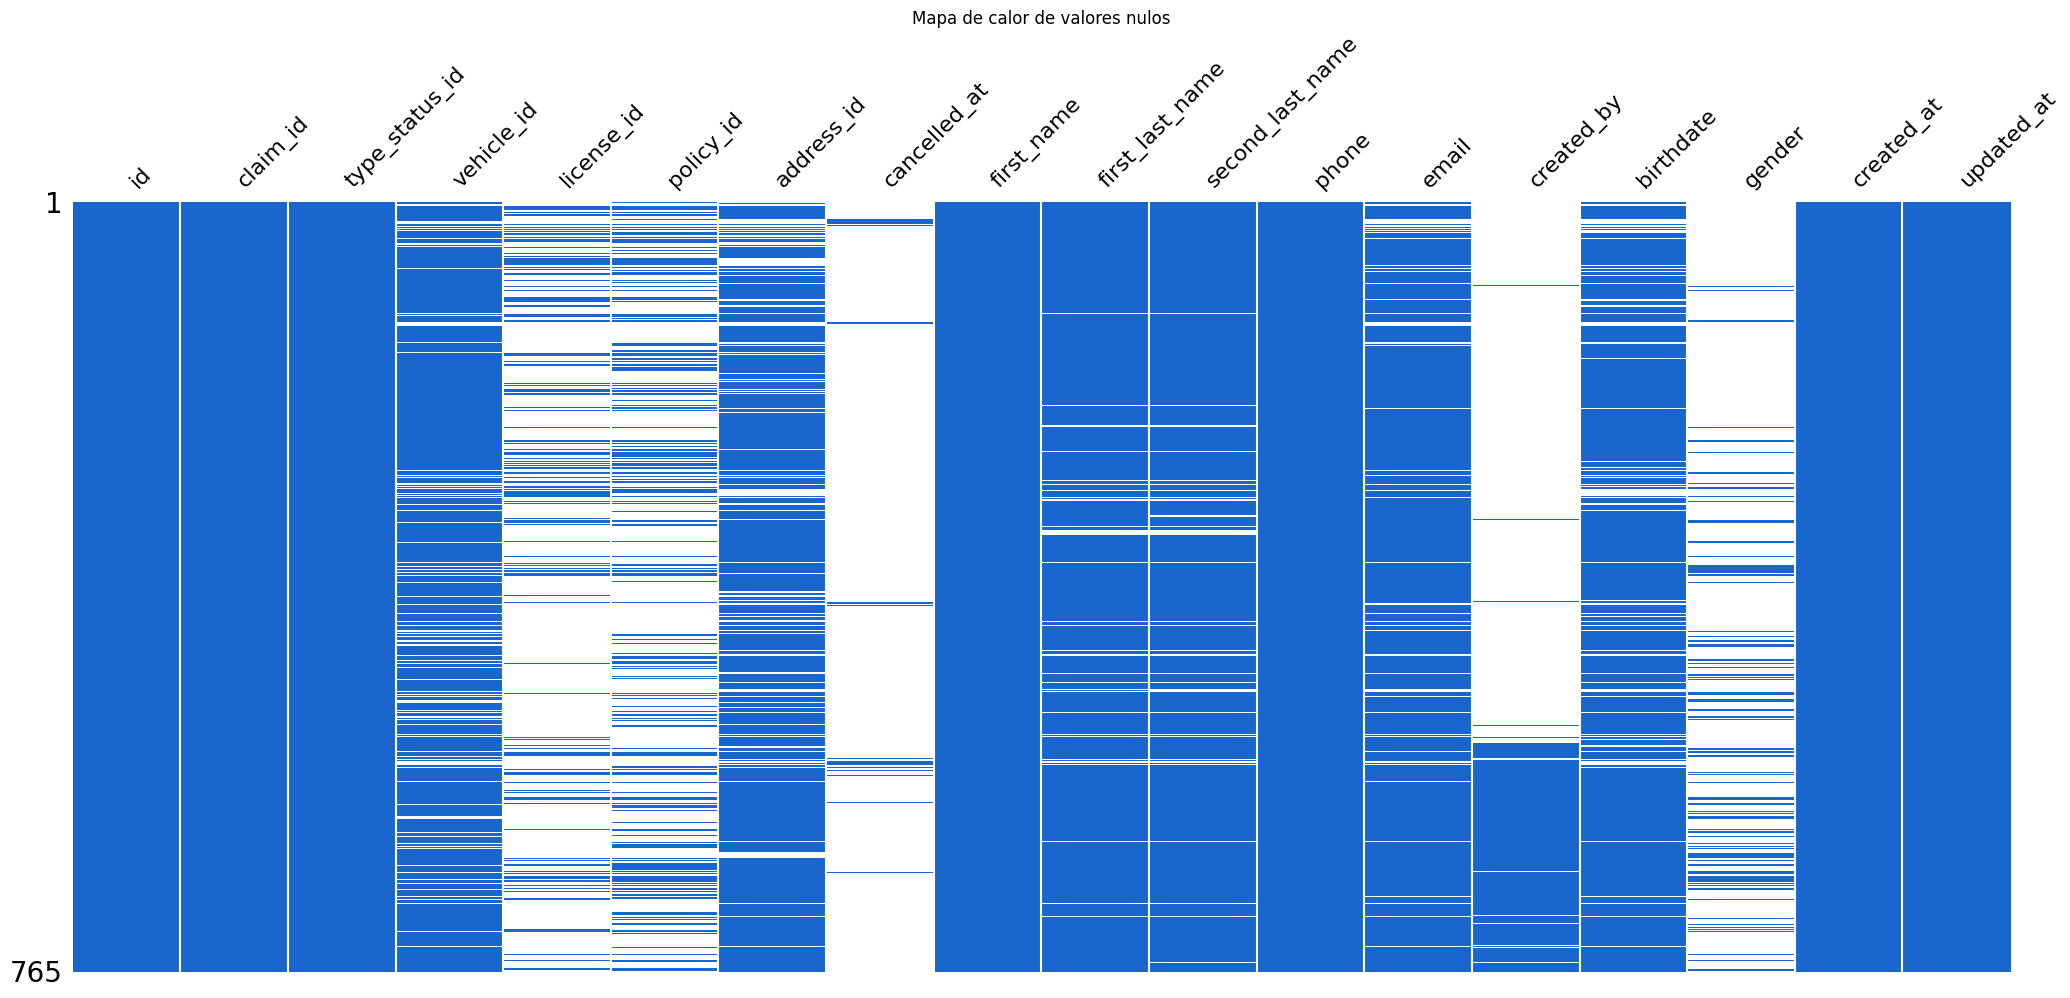

In [39]:
# Crear un mapa de calor con missingno
plt.figure(figsize=(10, 6))
msno.matrix(people, sparkline=False, color=(0.1, 0.4, 0.8))  # Ajusta el color según tus preferencias
plt.title('Mapa de calor de valores nulos')
plt.show()

Distribución de tipos de estado con nombres

In [97]:
status[status['id']== 'bfeff25f-6fd0-4529-99d0-4b21f2e89e8b']

,id,status_type_id,name,description,created_at,updated_at
49,bfeff25f-6fd0-4529-99d0-4b21f2e89e8b,8d132fec-876f-4aba-bf8d-7036aaef9daa,NaN,asegurado de crabi,2023-05-09 14:15:52 +00:00,2023-05-09 14:15:52 +00:00


In [100]:
status['name'].fillna('Cliente_Crabi',inplace=True)
peoplemerge=pd.merge(right=people,left=status[['id','name']],right_on='type_status_id',left_on='id',how='right')

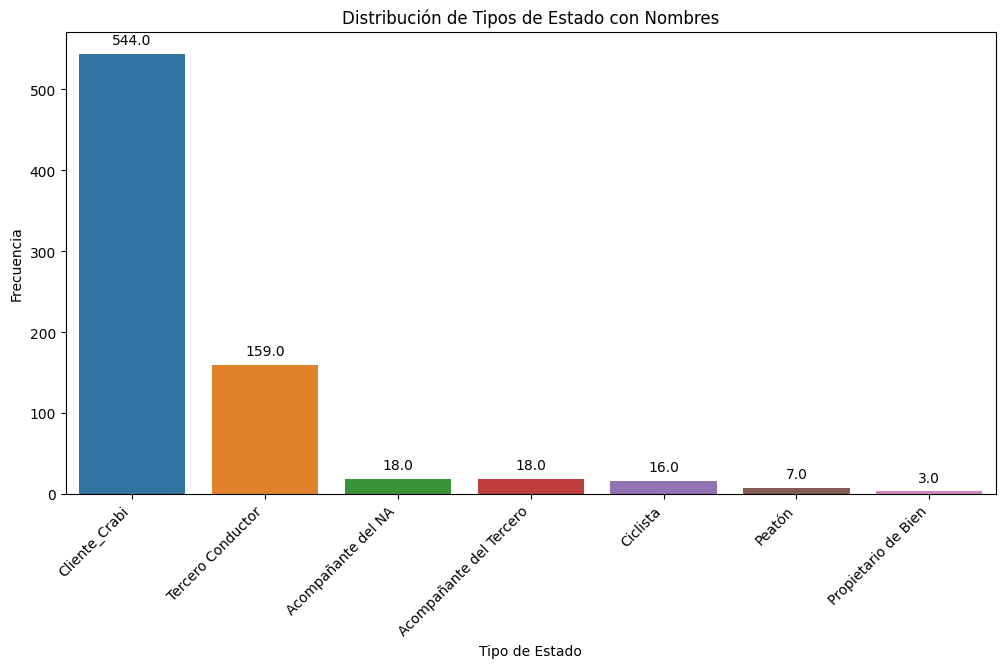

In [103]:
# Gráfico de barras para la distribución de tipos de estado con nombres
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='name', data=peoplemerge, order=peoplemerge['name'].value_counts().index)
plt.xlabel('Tipo de Estado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Estado con Nombres')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de cantidad encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Se observa que hay valores erróneos en la columna Birthday, y que hay una concentración entre los 20 y los 40.

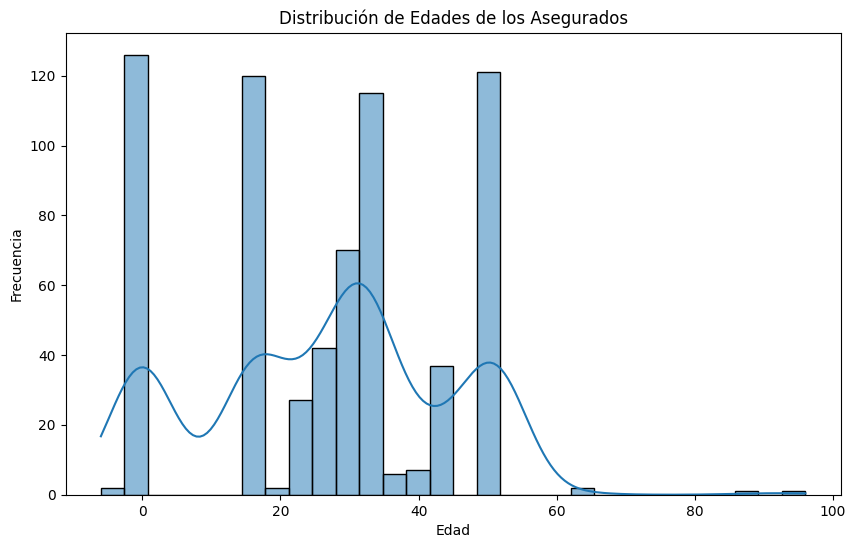

In [107]:
now = datetime.now()
people['age'] = (now - people['birthdate']).astype('<m8[Y]')

# Crear un histograma para la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(people['age'].dropna(), kde=True, bins=30)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Asegurados')
plt.show()

### TABLA Status

Columnas descriptivas de eventos

In [115]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              317 non-null    object
 1   status_type_id  317 non-null    object
 2   name            317 non-null    object
 3   description     75 non-null     object
 4   created_at      317 non-null    object
 5   updated_at      317 non-null    object
dtypes: object(6)
memory usage: 15.0+ KB


In [121]:
status['description'].sample(10)

15                 de NA o 3º sin Seguro hacia Crabi
139                                              NaN
52     conductor del auto contra el que colisiónó na
35                            empresa de ajustadores
235                                              NaN
183                                              NaN
136                                              NaN
73                                               NaN
39                                               NaN
231                                              NaN
Name: description, dtype: object

### TABLA Status_type

Otra tabla que nos brinda diferente información, lo más importante es el name y la description

In [123]:
status_type.sample(3)

,id,name,description,created_at,updated_at
16,d640d41f-4298-4fd5-8bda-dde42d9b6c72,CauseType,Tipos de causas de un claim,2023-05-09 08:15:52.000 -0600,2023-05-09 08:15:52.000 -0600
7,d80a1088-07d1-487e-9fb1-95f51611357b,PhotoType,Tipos de fotos,2023-05-09 08:15:52.000 -0600,2023-05-09 08:15:52.000 -0600
3,8d132fec-876f-4aba-bf8d-7036aaef9daa,PeopleType,Tipos de Personas,2023-05-09 08:15:52.000 -0600,2023-05-09 08:15:52.000 -0600


### TABLA Status Cause

Tabla que sirve para obtener información más detallada de la columna "status_cause_type_id" (que es igual a id de status_cause) de la tabla claim, ya que "status_id" de la tabla status_cause hace referencia a la tabla status.

In [125]:
status_cause.sample(3)

,id,status_id,sesa_id,created_at,updated_at
8,0dc676bd-6e4a-4806-b627-69a6237389d3,b66b96ef-933a-48f9-9ac1-65bff51d699e,9,2023-05-09 08:15:52.000 -0600,2023-05-09 08:15:52.000 -0600
2,5eec97a7-a9bb-45c8-942c-1d35454b4219,b66b96ef-933a-48f9-9ac1-65bff51d693e,3,2023-05-09 08:15:52.000 -0600,2023-05-09 08:15:52.000 -0600
20,ab9d1421-7c25-4224-aacc-15b757a6c9d8,b66b96ef-933a-48f9-9ac1-65bff51d61aa,99,2023-05-09 08:15:52.000 -0600,2023-05-09 08:15:52.000 -0600
